In [1]:
import keras
from keras import layers

In [2]:
encoding_dim = 32

In [3]:
input_img = keras.Input(shape=(784,))

In [4]:
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

In [6]:
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [7]:
autoencoder = keras.Model(input_img, decoded)

In [8]:
encoder = keras.Model(input_img, encoded)

In [9]:
encoded_input = keras.Input(shape=(encoding_dim,))

In [10]:
decoder_layer = autoencoder.layers[-1]

In [11]:
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
from keras.datasets import mnist
import numpy as np

In [14]:
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [15]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 16s 11ms/step - loss: 0.3885 - val_loss: 0.1889
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1803 - val_loss: 0.1547
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1504 - val_loss: 0.1344
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1319 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1203 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1130 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1078 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1035 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1004 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0982 - val_l

In [17]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [18]:
import matplotlib.pyplot as plt

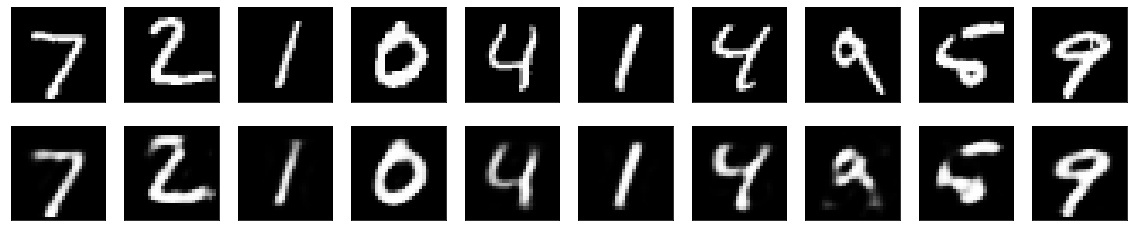

In [19]:
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [20]:
from keras import regularizers

In [21]:
encoding_dim = 32

In [22]:
input_img = keras.Input(shape=(784,))

In [23]:
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)

In [24]:
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [25]:
autoencoder = keras.Model(input_img, decoded)

In [28]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [29]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 5s 16ms/step - loss: 0.3405 - val_loss: 0.1681
Epoch 2/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1577 - val_loss: 0.1332
Epoch 3/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1316 - val_loss: 0.1227
Epoch 4/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1221 - val_loss: 0.1172
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1173 - val_loss: 0.1119
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1123 - val_loss: 0.1084
Epoch 7/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1082 - val_loss: 0.1055
Epoch 8/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1059 - val_loss: 0.1033
Epoch 9/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1036 - val_loss: 0.1014
Epoch 10/100
235/235 [==============================] - 4s 15ms/step - loss: 0.102

Convolutional Autoencoder

In [30]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


In [31]:
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [32]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [33]:
(x_train, _), (x_test, _) = mnist.load_data()

In [34]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [36]:
from keras.callbacks import TensorBoard

In [37]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 71s 145ms/step - loss: 0.3272 - val_loss: 0.1517
Epoch 2/50
469/469 [==============================] - 68s 145ms/step - loss: 0.1471 - val_loss: 0.1329
Epoch 3/50
469/469 [==============================] - 70s 150ms/step - loss: 0.1311 - val_loss: 0.1228
Epoch 4/50
469/469 [==============================] - 68s 145ms/step - loss: 0.1218 - val_loss: 0.1176
Epoch 5/50
469/469 [==============================] - 68s 146ms/step - loss: 0.1165 - val_loss: 0.1131
Epoch 6/50
469/469 [==============================] - 69s 146ms/step - loss: 0.1132 - val_loss: 0.1099
Epoch 7/50
469/469 [==============================] - 71s 151ms/step - loss: 0.1103 - val_loss: 0.1075
Epoch 8/50
469/469 [==============================] - 69s 146ms/step - loss: 0.1084 - val_loss: 0.1060
Epoch 9/50
469/469 [==============================] - 69s 147ms/step - loss: 0.1066 - val_loss: 0.1047
Epoch 10/50
469/469 [==============================] - 69s 147ms/step - l

In [38]:
decoded_imgs = autoencoder.predict(x_test)

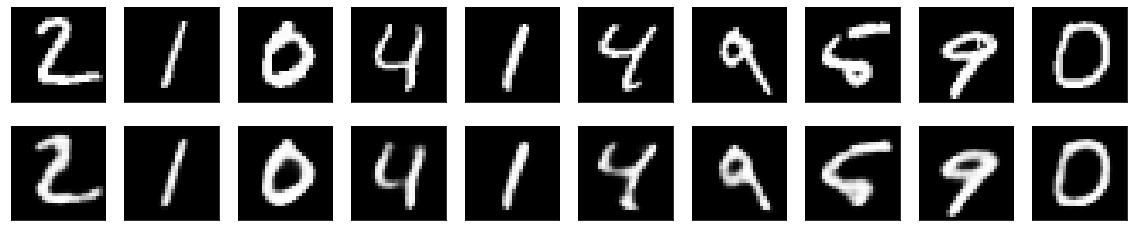

In [39]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):

    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

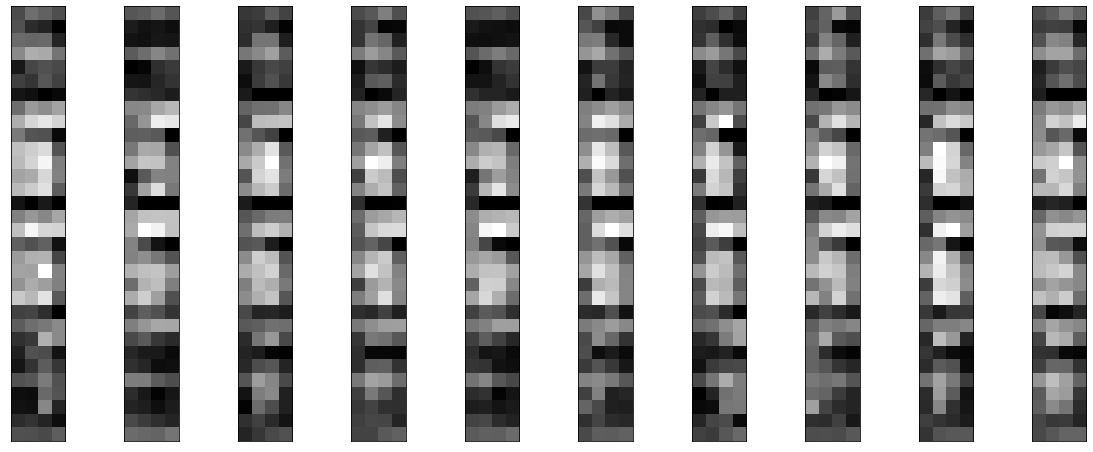

In [40]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Image Denoising

In [41]:
(x_train, _), (x_test, _) = mnist.load_data()

In [42]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [43]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [44]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

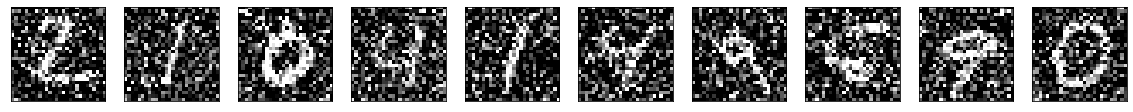

In [45]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [47]:
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [48]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 135s 286ms/step - loss: 0.2603 - val_loss: 0.1157
Epoch 2/100
469/469 [==============================] - 135s 288ms/step - loss: 0.1144 - val_loss: 0.1078
Epoch 3/100
469/469 [==============================] - 133s 284ms/step - loss: 0.1080 - val_loss: 0.1043
Epoch 4/100
469/469 [==============================] - 133s 284ms/step - loss: 0.1048 - val_loss: 0.1020
Epoch 5/100
469/469 [==============================] - 133s 284ms/step - loss: 0.1025 - val_loss: 0.1005
Epoch 6/100
469/469 [==============================] - 133s 283ms/step - loss: 0.1011 - val_loss: 0.0994
Epoch 7/100
469/469 [==============================] - 133s 283ms/step - loss: 0.1000 - val_loss: 0.0991
Epoch 8/100
469/469 [==============================] - 132s 282ms/step - loss: 0.0992 - val_loss: 0.0980
Epoch 9/100
469/469 [==============================] - 133s 283ms/step - loss: 0.0985 - val_loss: 0.0976
Epoch 10/100
469/469 [==============================] -

Variational autoencoder

In [ ]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

In [ ]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [ ]:
from keras import backend as K

In [ ]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')


In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

In [ ]:
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [ ]:
n = 15 
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()